In [1]:
import sys
from dotenv import load_dotenv, dotenv_values
load_dotenv("../cv19.env")
sys.path.append(dotenv_values("../cv19.env")["CV19ROOT"])

In [2]:
import pandas as pd

In [3]:
from cv19.simulation import simulation

In [4]:
# Initialize the simulation object
config_file = "../config_files/main.json"
sim = simulation(config_file, verbose=False)

In [5]:
# Run the simulation
sim.run()

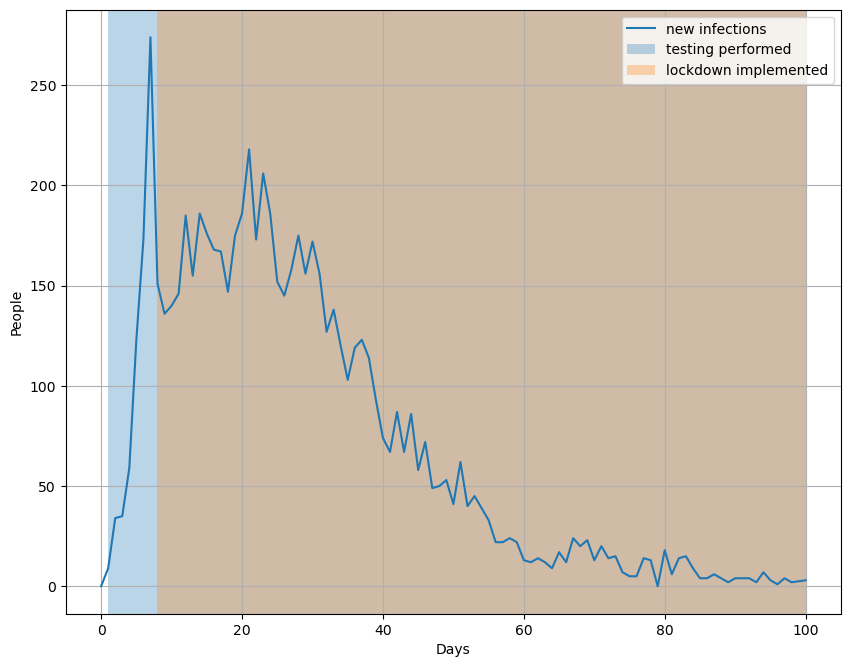

In [6]:
# Determine plot parameters and show the plot
plot_kws = {"plot_infected":False, "plot_recovered":False, "plot_dead":False, "plot_susceptible":False,
            "plot_new_infected":True, "plot_quarantined":False, "plot_tested":False, 
            "plot_lockdown":True, "plot_masks":False, "plot_testing":True, "plot_students":False,
            'log':False}        
sim.plot(**plot_kws)

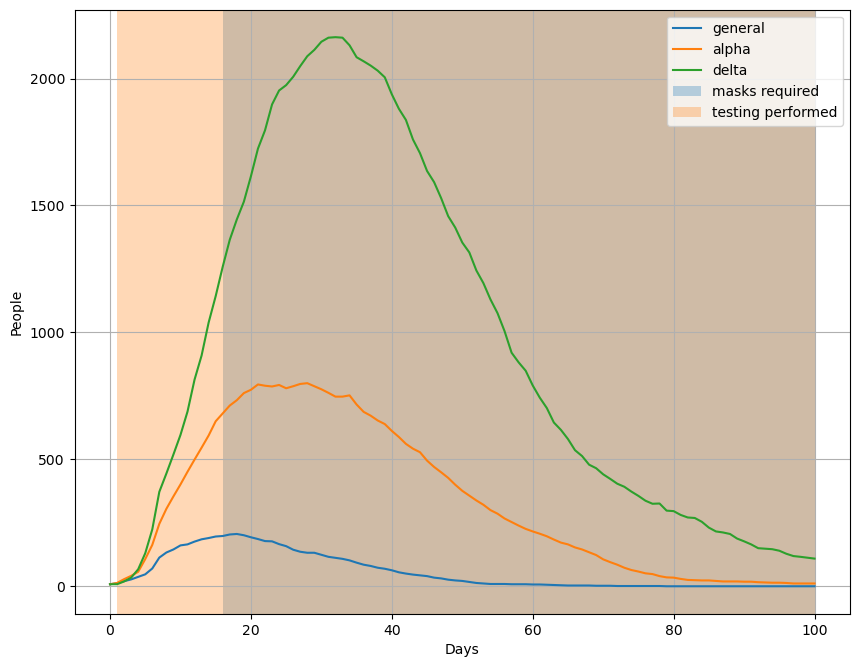

In [7]:
# Determine plot parameters and show the plot
plot_kws = {"plot_infected":False, "plot_recovered":False, "plot_dead":False, "plot_susceptible":False,
            "plot_new_infected":False, "plot_quarantined":False, "plot_tested":False, 
            "plot_lockdown":False, "plot_masks":True, "plot_testing":True, "plot_students":False,
            "plot_virus_types":{"general":True, "alpha":True, "delta":True},
            'log':False}        
sim.plot(**plot_kws)

In [8]:
# Example of how to access the raw data and convert to a pandas DataFrame.
raw_data = sim.get_arrays()
df = pd.DataFrame(raw_data)
df.index.rename('day', inplace=True)
df.head()

,infected,new_infected,recovered,susceptible,dead,quarantined,inf_students,total_tested,new_tested,hospitalized,testing_enforced,masks_enforced,lockdown_enforced,time_elapsed,general,alpha,delta
day,,,,,,,,,,,,,,,,,
0,24,0,0,9976,0,0,0,0,0,3,False,True,False,0.935319,8,8,8
1,33,9,0,9967,0,0,0,0,0,6,True,False,False,1.849413,12,13,8
2,67,34,0,9933,0,0,2,0,0,16,True,False,False,2.872651,20,28,19
3,102,35,0,9898,0,9,6,10,10,27,True,False,False,3.915022,27,41,34
4,161,59,0,9839,0,16,13,20,10,40,True,False,False,4.967460,37,57,67
